In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
path = 'ECA_blended_custom/TG_STAID004402.txt'

# Task 2

In [76]:
df = pd.read_csv(filepath_or_buffer=path, header=0, skiprows=19)
df.head()

,SOUID,DATE,TG,Q_TG
0,131004,19500101,-50,0
1,131004,19500102,4,0
2,131004,19500103,6,0
3,131004,19500104,4,0
4,131004,19500105,30,0


# Task 3

<AxesSubplot:>

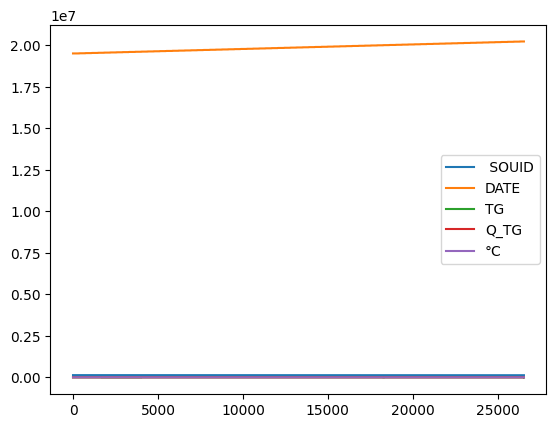

In [77]:
df['°C'] = df['TG']/10
df.plot.line()


# Task 4

<AxesSubplot:xlabel='DATE'>

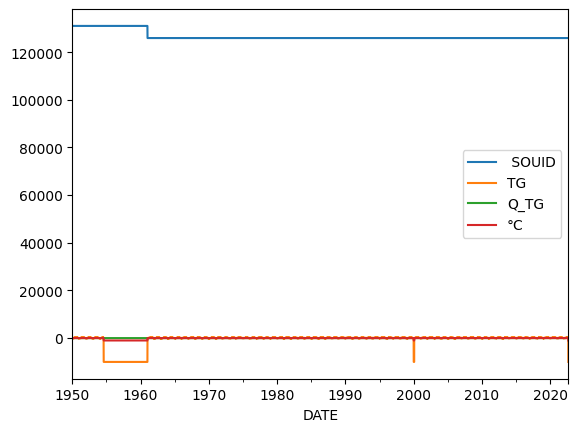

In [78]:
df['YEAR'] = df['DATE'].astype(str).str[0:4]
df['MONTH'] = df['DATE'].astype(str).str[4:6]
df['DAY'] = df['DATE'].astype(str).str[6:8]
df['DATE'] = df['YEAR']+'-'+df['MONTH']+'-'+df['DAY']
df = df.set_index(pd.to_datetime(df['DATE']))
df.plot.line()

# Task 5

In [79]:
df_mean = df[df.TG != -9999]
df_mean['°C'].mean()
df.loc[df['TG'] == -9999, 'TG'] = 81
df.loc[df['°C'] == -999.9, '°C'] = 8.1
df


,SOUID,DATE,TG,Q_TG,°C,YEAR,MONTH,DAY
DATE,,,,,,,,
1950-01-01,131004,1950-01-01,-50,0,-5.0,1950,01,01
1950-01-02,131004,1950-01-02,4,0,0.4,1950,01,02
1950-01-03,131004,1950-01-03,6,0,0.6,1950,01,03
1950-01-04,131004,1950-01-04,4,0,0.4,1950,01,04
1950-01-05,131004,1950-01-05,30,0,3.0,1950,01,05
...,...,...,...,...,...,...,...,...
2022-08-27,125916,2022-08-27,172,0,17.2,2022,08,27
2022-08-28,125916,2022-08-28,176,0,17.6,2022,08,28
2022-08-29,125916,2022-08-29,174,0,17.4,2022,08,29


# Task 6

In [80]:
df_last_year = df[df['DATE'] < '2022-01-01']
df_last_year

,SOUID,DATE,TG,Q_TG,°C,YEAR,MONTH,DAY
DATE,,,,,,,,
1950-01-01,131004,1950-01-01,-50,0,-5.0,1950,01,01
1950-01-02,131004,1950-01-02,4,0,0.4,1950,01,02
1950-01-03,131004,1950-01-03,6,0,0.6,1950,01,03
1950-01-04,131004,1950-01-04,4,0,0.4,1950,01,04
1950-01-05,131004,1950-01-05,30,0,3.0,1950,01,05
...,...,...,...,...,...,...,...,...
2021-12-27,125916,2021-12-27,49,0,4.9,2021,12,27
2021-12-28,125916,2021-12-28,55,0,5.5,2021,12,28
2021-12-29,125916,2021-12-29,69,0,6.9,2021,12,29


## Task 7

In [81]:
yearly_avg = df_last_year.groupby('YEAR')['°C'].median()
yearly_df = pd.DataFrame(yearly_avg)
yearly_df

,°C
YEAR,
1950,8.2
1951,7.2
1952,8.2
1953,8.5
1954,8.1
...,...
2017,9.1
2018,10.4
2019,8.7


## Heatmap

<AxesSubplot:title={'center':'yearly median temperature in Berlin-Dahlem'}, ylabel='YEAR'>

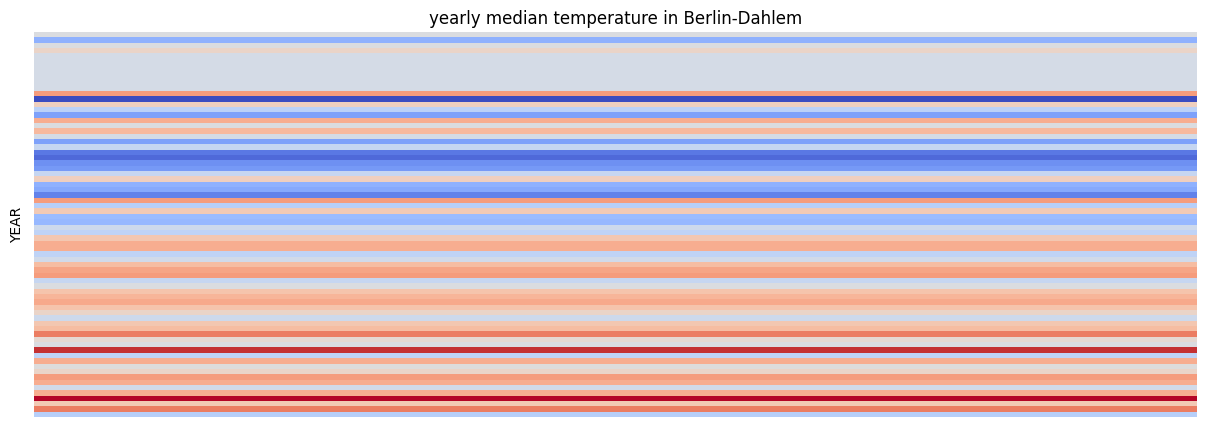

In [82]:
cmap = plt.get_cmap('coolwarm')

plt.figure(figsize=(15, 5))
plt.title('yearly median temperature in Berlin-Dahlem')
sns.heatmap(yearly_df, cmap=cmap, cbar=False, yticklabels=[], xticklabels=[])